<a href="https://colab.research.google.com/github/Es-YES-Ye/Python/blob/main/d16_01_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%run my_init.py

Mounted at /content/drive
tf.__version__: 2.8.0
keras.__version__: 2.8.0


In [ ]:
%matplotlib inline

In [ ]:
model = keras.models.load_model(r'/content/drive/MyDrive/청년취업사관학교/금천캠퍼스/02.딥러닝/best-cnn-model.h5')

In [ ]:
model.layers

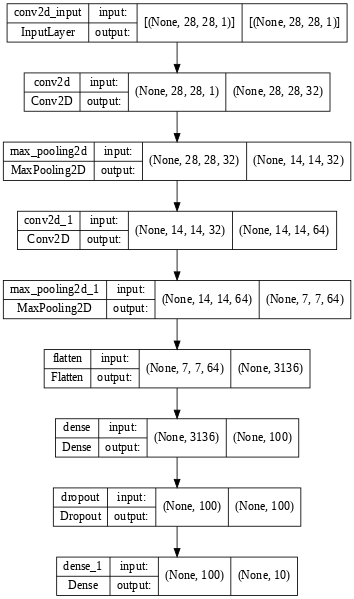

In [ ]:
keras.utils.plot_model(model, show_shapes=True, dpi=60)

In [ ]:
conv = model.layers[0]

In [ ]:
conv.weights[0].shape, conv.weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [ ]:
?keras.layers.Layer.weights

In [ ]:
np.mean(conv.weights[0]), np.std(conv.weights[0])

(-0.019786652, 0.27174228)

In [ ]:
np.min(conv.weights[0]), np.max(conv.weights[0])

(-1.7435269, 0.4942378)

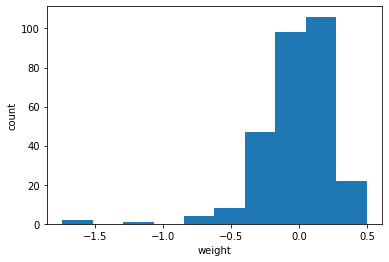

In [ ]:
plt.hist(conv.weights[0].numpy().reshape(-1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

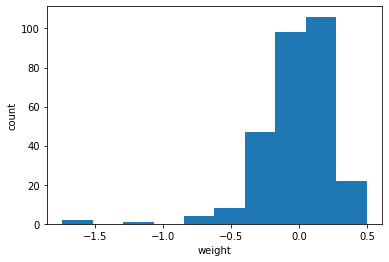

In [ ]:
plt.hist(conv.weights[0].numpy().ravel()) #flatten()
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

In [ ]:
conv.weights[0].numpy()[:, :, 0, 0] # 첫 번째 필터의 커널 정보(=가중치) <= 학습된 결과 

array([[ 0.34763944,  0.23933959, -0.42653647],
       [-0.01938307,  0.07038993, -0.5092756 ],
       [-0.02680635,  0.4942378 , -0.11677799]], dtype=float32)

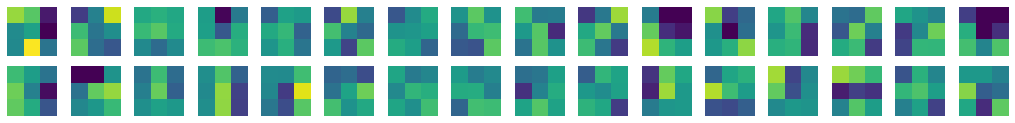

In [ ]:
fig, axes = plt.subplots(2, 16, figsize=(18, 2))
for i in range(2):
  for j in range(16):
    axes[i, j].imshow(conv.weights[0].numpy()[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
    axes[i, j].axis('off')
plt.show()

In [ ]:
no_training_model = keras.Sequential()

In [ ]:
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, padding='same', \
                                          input_shape=(28, 28, 1), activation='relu'))

In [ ]:
no_training_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
no_training_model.layers

In [ ]:
no_training_conv = no_training_model.layers[0]
no_training_conv.weights[0].shape, no_training_conv.weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [ ]:
np.mean(no_training_conv.weights[0]), np.std(no_training_conv.weights[0])

(0.0045713168, 0.08177504)

In [ ]:
np.min(no_training_conv.weights[0]), np.max(no_training_conv.weights[0])

(-0.14189982, 0.14213137)

In [ ]:
from scipy.stats import uniform

rv = uniform.rvs(0, 1, (3, 3, 1, 32), random_state=42)
rv.shape

(3, 3, 1, 32)

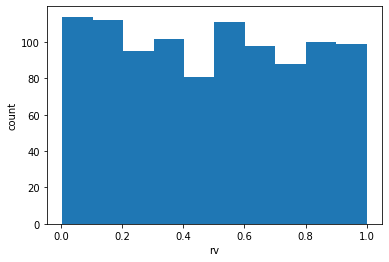

In [ ]:
plt.hist(rv)
plt.xlabel('rv')
plt.ylabel('count')
plt.show()

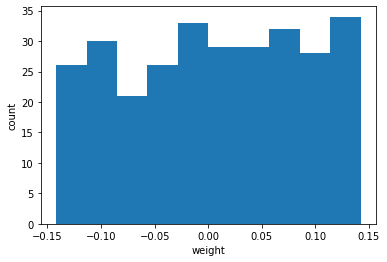

In [ ]:
plt.hist(no_training_conv.weights[0].numpy().reshape(-1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

In [ ]:
no_training_conv.weights[0].numpy()[:, :, 0, 0]

array([[ 0.01164627,  0.04721195, -0.02703299],
       [ 0.08824949, -0.05629809,  0.1215433 ],
       [ 0.08835417,  0.06624202,  0.12374552]], dtype=float32)

In [ ]:
no_training_conv.weights[0].numpy().min(), no_training_conv.weights[0].numpy().max()

(-0.14189982, 0.14213137)

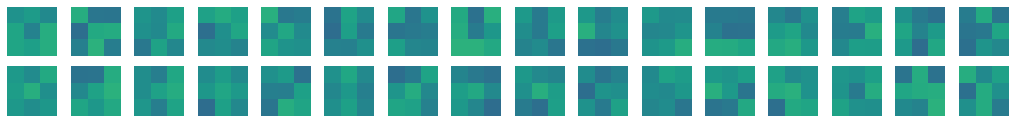

In [ ]:
fig, axes = plt.subplots(2, 16, figsize=(18, 2))
for i in range(2):
  for j in range(16):
    axes[i, j].imshow(no_training_conv.weights[0].numpy()[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
    axes[i, j].axis('off')
plt.show()